In [1]:

from script import KEX


## Ladda in 2q0s

In [2]:
s = KEX("2q0s_full.pdb")

## Skapa liganderna 

In [3]:
s.create_molecule(smiles = "C[C@H](O)c1ccccc1", name = "S_substrate", show_structure= False)
s.create_molecule(smiles = "C[C@@H](O)c1ccccc1", name = "R_substrate", show_structure= False)

Molecule saved as S_substrate.mol
Molecule saved as R_substrate.mol


In [4]:
s.mol_to_pdbqt_new("S_substrate.mol", add_ligand = True)
s.mol_to_pdbqt_new("R_substrate.mol", add_ligand = True)

## Acetylerat serin

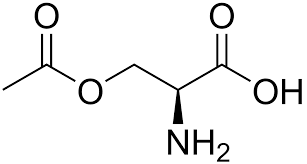

In [5]:
s.create_molecule(smiles = "N[C@@H](COC(=O)C)C(=O)O", name = "acetyl_serine", show_structure= False)

Molecule saved as acetyl_serine.mol


In [6]:
s.mol_to_pdbqt_new("acetyl_serine.mol", add_ligand = False)

## Acetyleringen som ska byggas i pymol

- ATOM     14  C   UNK     1       1.948  -0.352   0.284  0.00  0.00    +0.304 C 
- ATOM     15  O   UNK     1       1.824  -1.101   1.242  0.00  0.00    -0.251 OA
- BRANCH  14  16
- ATOM     16  C   UNK     1       3.181   0.440  -0.025  0.00  0.00    +0.033 C 
- ATOM     17  H   UNK     1       2.950   1.508  -0.003  0.00  0.00    +0.034 HD
- ATOM     18  H   UNK     1       3.944   0.232   0.731  0.00  0.00    +0.034 HD
- ATOM     19  H   UNK     1       3.572   0.150  -1.003  0.00  0.00    +0.034 HD

## Konvertering från pqr till pdbqt

In [7]:
# fixa 

## Docking i smina

In [8]:
s.pdbqt_filenames = ["2q0s_acetyl_new.pdbqt", "F149V_F153V_acetyl_md_fardig.pdbqt", "F153V_F173V_acetyl_md_fardig.pdbqt"]
df = s.smina_docking(center=(20.7, 54.6, 28.3), boxsize=18, scoring_file="custom_scoring_new.txt")
df

,S_substrate (kcal/mol),R_substrate (kcal/mol)
2q0s_acetyl_new,-6.192452,-6.286190
F149V_F153V_acetyl_md_fardig,-5.298216,-5.342927
F153V_F173V_acetyl_md_fardig,-5.916883,-5.968106
